In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from lib.sych.data_fc_db import DataFCDatabase

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yarodata/neuro'
# params['behaviour_pooled_48'] = gui_fname("Pooled file", "./", "(*.mat)")
params['behaviour_pooled_48'] = '/media/alyosha/Data/TE_data/yarodata/behaviour_pooled/behavior_4m.mat'

In [3]:
dataDB = DataFCDatabase(params)

Target trial within [0, 8] sec. Total target timesteps 161
Searching for channel labels
Searching for data files
No paw path provided, skipping
No lick path provided, skipping
No whisk path provided, skipping


In [16]:
dataDB.read_pooled_behaviour(params['behaviour_pooled_48'])

11
18
15
21


lick_rate


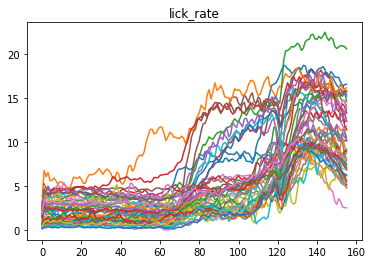

nose


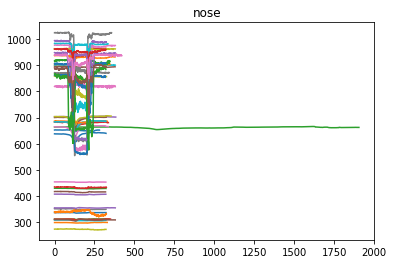

envelope2


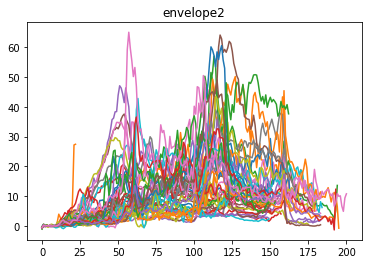

whisker_angle_2


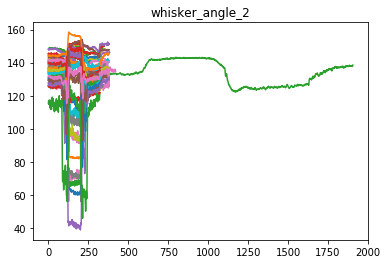

touch_processed


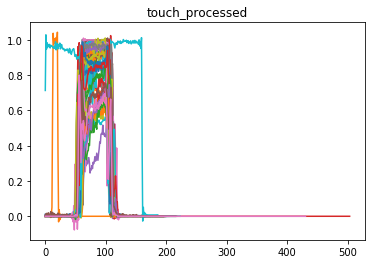

envelope1


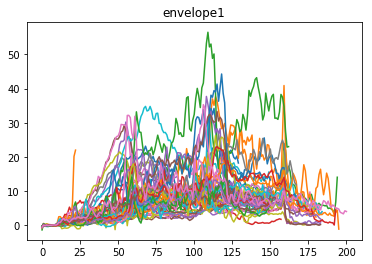

lick_trials


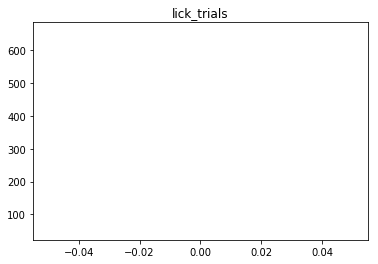

touch


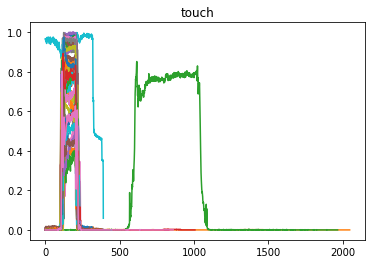

reaction_time


IndexError: tuple index out of range

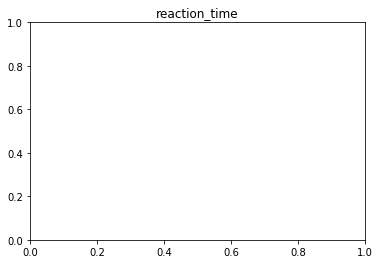

In [21]:
for behavType in dataDB.dataBehaviourPooledKeys:
    print(behavType)
    plt.figure()
    plt.title(behavType)
    
    for idx, row in dataDB.metaDataFrames['pooled_behaviour'].iterrows():
        dataThis = dataDB.dataBehaviourPooled[idx]
        
        if behavType in dataThis.keys():
            plt.plot(np.mean(dataThis[behavType], axis=0), label=row['mousekey'])
            
#     plt.legend()
    plt.show()